         Date        Open        High         Low       Close   Adj Close  \
0  2018-05-23  182.500000  186.910004  182.179993  186.899994  186.899994   
1  2018-05-24  185.880005  186.800003  185.029999  185.929993  185.929993   
2  2018-05-25  186.020004  186.330002  184.449997  184.919998  184.919998   
3  2018-05-29  184.339996  186.809998  183.710007  185.740005  185.740005   
4  2018-05-30  186.539993  188.000000  185.250000  187.669998  187.669998   

     Volume  
0  16628100  
1  12354700  
2  10965100  
3  16398900  
4  13736900  
(252, 7)


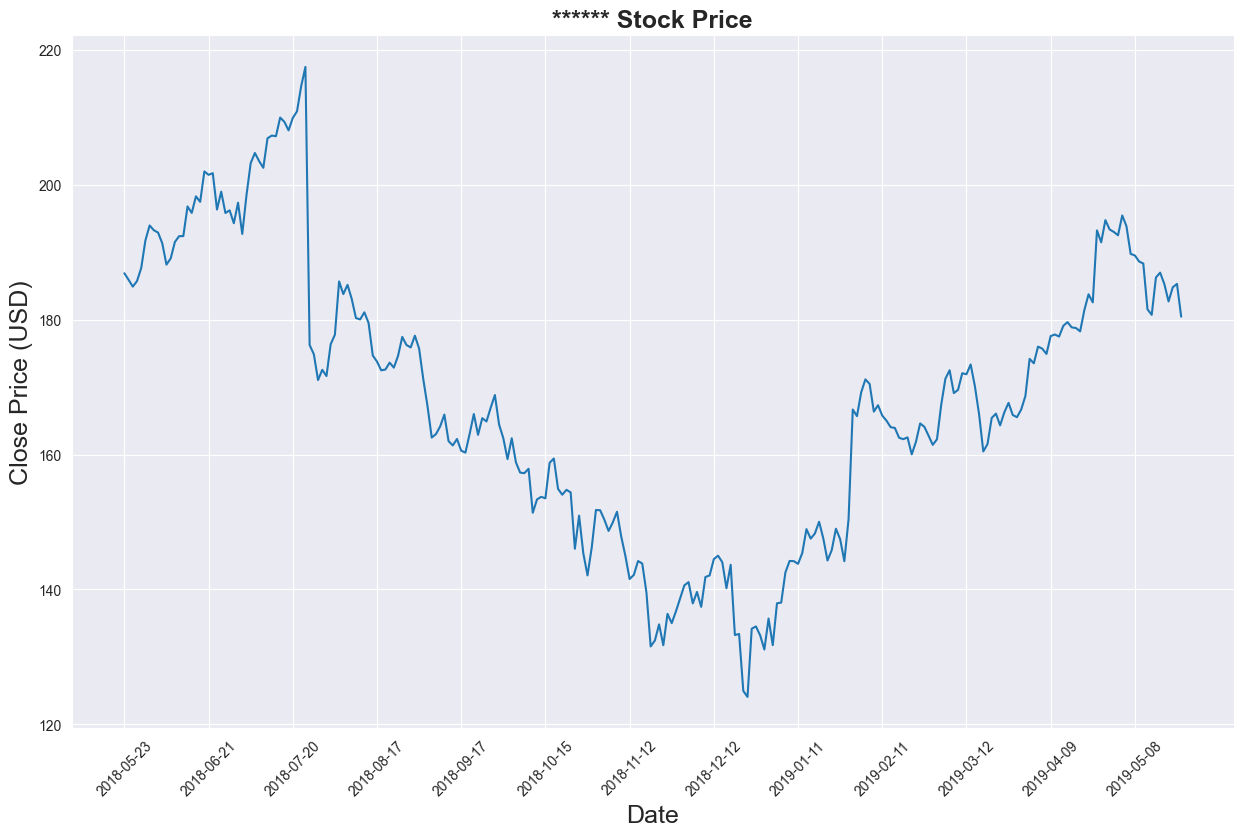

In [17]:
import numpy as np               # 导入NumPy库，用于科学计算
import pandas as pd              # 导入Pandas库，用于数据操作和分析
import matplotlib.pyplot as plt  # 导入Matplotlib库中的pyplot模块，用于绘图
import seaborn as sns            # 导入Seaborn库，用于增强Matplotlib的绘图功能

filepath = 'rlData.csv'          # 定义CSV文件的路径
data = pd.read_csv(filepath)     # 读取CSV文件中的数据并存储到data变量中
data = data.sort_values('Date')  # 按照日期列对数据进行排序
print(data.head())               # 打印数据前五行，查看数据基本情况
print(data.shape)                # 打印数据的形状（行数，列数）

sns.set_style("darkgrid")        # 设置Seaborn绘图的风格为黑暗网格
plt.figure(figsize=(15, 9))      # 创建一个大小为15x9英寸的绘图窗口
plt.plot(data[['Close']])        # 绘制收盘价数据的折线图
plt.xticks(range(0, data.shape[0], 20), data['Date'].loc[::20], rotation=45)
                                 # 设置x轴的刻度标签，每20个数据点显示一个日期，并旋转45度
plt.title("****** Stock Price", fontsize=18, fontweight='bold')
                                 # 设置图表标题及其字体大小和加粗样式
plt.xlabel('Date', fontsize=18)  # 设置x轴标签及其字体大小
plt.ylabel('Close Price (USD)', fontsize=18)
                                 # 设置y轴标签及其字体大小
plt.show()                       # 显示绘制的图表


## 1.特征工程

In [18]:
# 选取Close作为特征
price = data[['Close']]              # 从数据集中选取收盘价（Close）列作为特征
print(price.info())                  # 打印选取特征后的数据框信息

from sklearn.preprocessing import MinMaxScaler  # 从sklearn库中导入MinMaxScaler进行数据缩放
# 进行数据缩放，将数据缩放到-1和1之间
scaler = MinMaxScaler(feature_range=(-1, 1))    # 创建MinMaxScaler对象，设置缩放范围为-1到1
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1, 1))
                                               # 对收盘价数据进行缩放，并将结果更新到price数据框中
                                               # 先将收盘价数据转换为二维数组，再进行缩放

print(price['Close'].shape)                    # 打印缩放后的数据形状


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB
None
(252,)


C:\Users\86173\AppData\Local\Temp\ipykernel_13448\1693997037.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
price

,Close
0,0.345034
1,0.324272
2,0.302654
3,0.320206
4,0.361515
...,...
247,0.310788
248,0.255565
249,0.300514
250,0.311216


## 2.数据集制作

In [19]:
# 今天的收盘价预测明天的收盘价
# lookback表示观察的跨度
from sklearn.model_selection import train_test_split
def split_data(stock, lookback):
    data_raw = stock.to_numpy()    # 将数据框转换为NumPy数组
    data = []                      # 初始化存储切分数据的列表

    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback]) # 遍历数据，生成长度为lookback的滑动窗口序列并添加到data列表中

    data = np.array(data)  # 将列表转换为NumPy数组
    test_set_size = int(np.round(0.2 * data.shape[0])) # 计算测试集大小，占总数据的20%
    train_set_size = data.shape[0] - (test_set_size) # 计算训练集大小，占总数据的80%

    x_train = data[:train_set_size, :-1, :] # 提取训练集的输入特征（不包括最后一个数据点）
    y_train = data[:train_set_size, -1, :] # 提取训练集的目标值（包括最后一个数据点）
    x_test = data[train_set_size:, :-1] # 提取测试集的输入特征（不包括最后一个数据点）
    y_test = data[train_set_size:, -1, :] # 提取测试集的目标值（包括最后一个数据点）

    return [x_train, y_train, x_test, y_test]  # 返回训练集和测试集的特征和目标值

lookback = 20                       # 定义lookback的跨度为20天
x_train, y_train, x_test, y_test = split_data(price, lookback) # 调用split_data函数进行数据切分
print('x_train.shape = ', x_train.shape)    # 打印训练集特征的形状
print('y_train.shape = ', y_train.shape)    # 打印训练集目标的形状
print('x_test.shape = ', x_test.shape)      # 打印测试集特征的形状
print('y_test.shape = ', y_test.shape)      # 打印测试集目标的形状


x_train.shape =  (186, 19, 1)
y_train.shape =  (186, 1)
x_test.shape =  (46, 19, 1)
y_test.shape =  (46, 1)


## 3.模型构建 —— LSTM

In [20]:
import torch                     # 导入PyTorch库
import torch.nn as nn            # 导入PyTorch的神经网络模块

# 将NumPy数组转换为PyTorch张量，并指定数据类型为Tensor
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

# 输入的维度为1，只有Close收盘价
input_dim = 1
# 隐藏层特征的维度
hidden_dim = 32
# 循环的层数
num_layers = 2
# 预测后一天的收盘价
output_dim = 1
# 训练的轮数
num_epochs = 100

# 定义LSTM模型
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim          # 隐藏层特征的维度
        self.num_layers = num_layers          # LSTM的层数

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
                                              # 定义LSTM层，输入维度、隐藏层维度、层数以及batch_first参数
        self.fc = nn.Linear(hidden_dim, output_dim)
                                              # 定义全连接层，将隐藏层输出映射到输出维度

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
                                              # 初始化隐藏状态h0，形状为（层数，批次大小，隐藏层维度）
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
                                              # 初始化细胞状态c0，形状同上

        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
                                              # 前向传播，通过LSTM层，输出为out，最后的隐藏状态和细胞状态为hn和cn
        out = self.fc(out[:, -1, :])           # 取LSTM的最后一个时间步的输出并通过全连接层
        return out                            # 返回输出

# 创建LSTM模型实例
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

criterion = torch.nn.MSELoss()               # 定义损失函数为均方误差损失
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
                                              # 定义优化器为Adam，并设置学习率为0.01


## 4.模型训练

In [21]:
import time                         # 导入时间模块，用于计算训练时间

hist = np.zeros(num_epochs)         # 初始化一个数组，用于存储每个epoch的损失值
start_time = time.time()            # 记录训练开始时间
lstm = []                           # 初始化一个列表，用于存储LSTM模型的输出（暂时未使用）

for t in range(num_epochs):         # 开始训练循环，共进行num_epochs次训练
    y_train_pred = model(x_train)   # 前向传播，计算训练集的预测值

    loss = criterion(y_train_pred, y_train_lstm)
                                    # 计算损失函数值，比较预测值与真实值的均方误差
    print("Epoch ", t, "MSE: ", loss.item())
                                    # 打印当前epoch的损失值
    hist[t] = loss.item()           # 将损失值存储到hist数组中

    optimiser.zero_grad()           # 清零梯度，以防止梯度累积
    loss.backward()                 # 反向传播，计算梯度
    optimiser.step()                # 更新模型参数

training_time = time.time() - start_time
                                    # 计算训练所用的总时间
print("Training time: {}".format(training_time))
                                    # 打印训练时间


Epoch  0 MSE:  0.35762906074523926
Epoch  1 MSE:  0.2530500888824463
Epoch  2 MSE:  0.19904492795467377
Epoch  3 MSE:  0.19599351286888123
Epoch  4 MSE:  0.18773110210895538
Epoch  5 MSE:  0.16199657320976257
Epoch  6 MSE:  0.143762469291687
Epoch  7 MSE:  0.12716922163963318
Epoch  8 MSE:  0.10001163184642792
Epoch  9 MSE:  0.06003347411751747
Epoch  10 MSE:  0.06535005569458008
Epoch  11 MSE:  0.04892656207084656
Epoch  12 MSE:  0.05776501074433327
Epoch  13 MSE:  0.057412102818489075
Epoch  14 MSE:  0.04065535217523575
Epoch  15 MSE:  0.03045162558555603
Epoch  16 MSE:  0.03162923455238342
Epoch  17 MSE:  0.03566037863492966
Epoch  18 MSE:  0.036326996982097626
Epoch  19 MSE:  0.03432752192020416
Epoch  20 MSE:  0.03200499340891838
Epoch  21 MSE:  0.030322475358843803
Epoch  22 MSE:  0.02958219312131405
Epoch  23 MSE:  0.029807865619659424
Epoch  24 MSE:  0.029503799974918365
Epoch  25 MSE:  0.027345173060894012
Epoch  26 MSE:  0.02479875460267067
Epoch  27 MSE:  0.02337969467043876

## 5.模型结果可视化

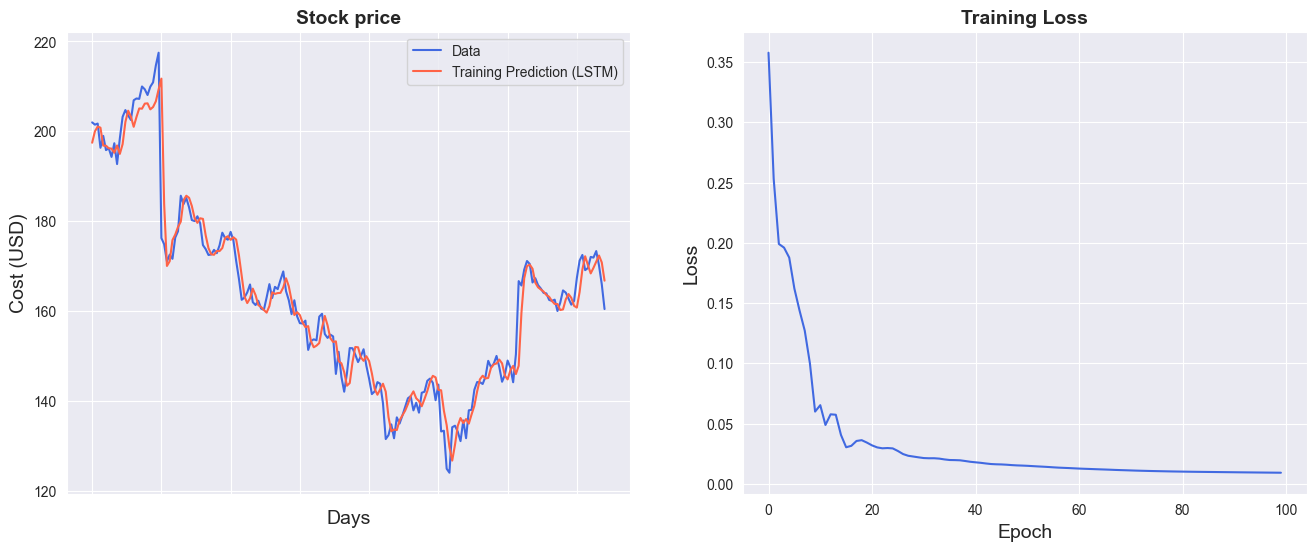

In [22]:
# 将预测值和真实值进行逆缩放，转换回原始的收盘价
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

import seaborn as sns                 # 导入Seaborn库，用于绘图
sns.set_style("darkgrid")             # 设置绘图风格为darkgrid

fig = plt.figure()                    # 创建一个新的图形对象
fig.subplots_adjust(hspace=0.2, wspace=0.2)
                                      # 调整子图之间的间距

plt.subplot(1, 2, 1)                  # 创建第一个子图
ax = sns.lineplot(x=original.index, y=original[0], label="Data", color='royalblue')
                                      # 绘制原始收盘价曲线
ax = sns.lineplot(x=predict.index, y=predict[0], label="Training Prediction (LSTM)", color='tomato')
                                      # 绘制LSTM模型的训练预测曲线

ax.set_title('Stock price', size=14, fontweight='bold')
                                      # 设置第一个子图的标题
ax.set_xlabel("Days", size=14)        # 设置x轴标签
ax.set_ylabel("Cost (USD)", size=14)  # 设置y轴标签
ax.set_xticklabels('', size=10)       # 设置x轴刻度标签大小

plt.subplot(1, 2, 2)                  # 创建第二个子图
ax = sns.lineplot(data=hist, color='royalblue')
                                      # 绘制训练损失值曲线
ax.set_xlabel("Epoch", size=14)       # 设置x轴标签
ax.set_ylabel("Loss", size=14)        # 设置y轴标签
ax.set_title("Training Loss", size=14, fontweight='bold')
                                      # 设置第二个子图的标题
fig.set_figheight(6)                  # 设置图形高度
fig.set_figwidth(16)                  # 设置图形宽度
plt.show()                            # 显示图形


## 6.模型验证

In [23]:
import math, time                       # 导入数学和时间模块
from sklearn.metrics import mean_squared_error, r2_score
                                        # 导入均方误差和R2评分函数

# make predictions
y_test_pred = model(x_test)             # 使用模型对测试集进行预测

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
                                        # 对训练集的预测结果进行逆缩放
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
                                        # 对训练集的真实值进行逆缩放
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
                                        # 对测试集的预测结果进行逆缩放
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())
                                        # 对测试集的真实值进行逆缩放

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:, 0], y_train_pred[:, 0]))
                                        # 计算训练集的均方根误差
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:, 0], y_test_pred[:, 0]))
                                        # 计算测试集的均方根误差
print('Test Score: %.2f RMSE' % (testScore))

trainr2Score = r2_score(y_train[:, 0], y_train_pred[:, 0])
                                        # 计算训练集的R2评分
print('Train Score: %.2f R2' % (trainr2Score))
testr2Score = r2_score(y_test[:, 0], y_test_pred[:, 0])
                                        # 计算测试集的R2评分
print('Test Score: %.2f R2' % (testr2Score))

lstm.append(trainScore)                 # 将训练集RMSE添加到lstm列表
lstm.append(testScore)                  # 将测试集RMSE添加到lstm列表
lstm.append(training_time)              # 将训练时间添加到lstm列表

# shift train predictions for plotting
trainPredictPlot = np.empty_like(price) # 创建与price形状相同的空数组
trainPredictPlot[:, :] = np.nan         # 将所有值初始化为NaN
trainPredictPlot[lookback:len(y_train_pred) + lookback, :] = y_train_pred
                                        # 将训练集预测值放入对应的位置

# shift test predictions for plotting
testPredictPlot = np.empty_like(price)  # 创建与price形状相同的空数组
testPredictPlot[:, :] = np.nan          # 将所有值初始化为NaN
testPredictPlot[len(y_train_pred) + lookback - 1:len(price) - 1, :] = y_test_pred
                                        # 将测试集预测值放入对应的位置

original = scaler.inverse_transform(price['Close'].values.reshape(-1, 1))
                                        # 对原始的收盘价数据进行逆缩放

# Combine predictions for plotting
predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
                                        # 将训练集和测试集的预测值合并
predictions = np.append(predictions, original, axis=1)
                                        # 将原始的收盘价数据添加到预测值中
result = pd.DataFrame(predictions)      # 将结果转换为DataFrame


Train Score: 4.51 RMSE
Test Score: 3.17 RMSE
Train Score: 0.95 R2
Test Score: 0.89 R2


## 7. 绘制图像

In [24]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()